# Module 3 Assessment

Welcome to your Mod 3 Assessment. You will be tested for your understanding of concepts and ability to solve problems that have been covered in class and in the curriculum.

Use any libraries you want to solve the problems in the assessment.

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

**Note on the short answer questions**: For the short answer questions please use your own words. The expectation is that you have not copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics



In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import pickle

## Part 1: Combinatorics, Probability & Discrete Distributions [Suggested time: 20 minutes]

### a. Set Theory

Given the following probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2`, respectively, in the next cell:

1.a.1) $P(A and B)$
1.a.2) $P(A|B)$

Hint: draw a diagram!


In [51]:
ans1 = 0.4 * 0.7
ans2 = ans1 / 0.5
print('ans1 =', ans1)
print('ans2 = ', ans2)

ans1 = 0.27999999999999997
ans2 =  0.5599999999999999


### b. Card Combinatorics

A standard deck of playing cards consists of 52 cards in each of the four suits of spades, hearts, diamonds, and clubs. Each suit contains 13 cards: Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King.
    
You have a standard deck of 52 cards and are asked the following questions:

1.b.1) What is the probability of drawing a King or a Queen?

1.b.2) How many possible 5-card combinations can be formed with this deck of 52 cards?

Answer the questions below:

In [36]:
def factorial(num):
    if num == 0 or num == 1:
        x = 1
    else:
        x = num * factorial(num - 1)
        num -= 1
    return x

def comb(n, r):
    return factorial(n) / (factorial(n - r) * factorial(r))

def perm(n, r):
    return factorial(n) / factorial(n - r) 

def binomial(n, r, p):
    return comb(n, r) * p ** r * (1 - p) ** (n - r)

In [39]:
ans1 = None
ans2 = comb(52, 5)
print('ans2 = ', ans2)

ans2 =  2598960.0


### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (Jack, Queen, or King). 

The function `probability_of_scoring_k` is provided below. In this function, $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point. The function returns the corresponding probability of scoring $k$ points given $n$ and $p$.

In [40]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    
    # defining a helper function for factorial
    def fact(n):
        return np.math.factorial(n)
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1.c.1) What is the probability $p$ of winning a point? 

In [42]:
# your code here 
p = 12/52 
p

0.23076923076923078

1.c.2) Use the function `probability_of_scoring_k` to compute the probability of scoring 8 points out out of 22 draws.

In [44]:
# your code here 
n = 22
k = 8
ans1 = probability_of_scoring_k(n, p, k)
print(ans1)

0.06532117736042573


1.c.3) Use the function `probability_of_scoring_k` to calculate the probability of drawing $k$ points out of 22 draws, for $k$ ranging from 0 to 22. 

_Hint: Your final result should be in the form of a list or array._

In [47]:
# your code here
k_values = range(23)
ans = []
for k in k_values:
    ans.append(probability_of_scoring_k(n, p, k))

1.c.4) Plot your results to create the probability mass function. Use a bar plot. What type of distribution does the `probability_of_scoring_k` have?

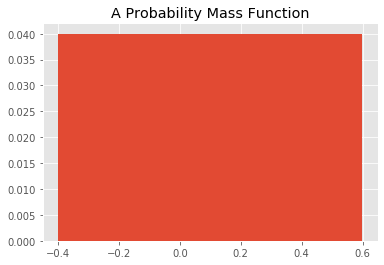

In [55]:
# your code here
import numpy as np
import matplotlib.pyplot as plt
import collections

counter = collections.Counter(ans)

# Convert the frequency to probability
pmf = []
for key,val in counter.items():
    pmf.append(round(val/len(ans), 2))

import numpy as np

np.array(pmf).sum() # Check that it sums to 1 approximately

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.bar(counter.keys(), pmf);
plt.title("A Probability Mass Function");

In [ ]:
# your answer here 
# It shows uniform distribution 

## Part 2: Statistical Distributions [Suggested time: 25 minutes]

### a. Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

2.a.1) Write a function to compute the z-scores for single checks of amount `check_amt`.

In [3]:
mu = 20
sigma = 2

def z_score(check_amt):
    """
    check_amt = the amount for which we want to compute the z-score
    """
    return (check_amt - mu) / sigma

2.a.2) I go to the TexMex restaurant and get a check for 24 dollars. 

Use your function to compute your check's z-score, and interpret the result using the empirical rule. 

In [7]:
# your code here 
z_score(24)

2.0

In [ ]:
# your answer here
# The check of amount 24 dollars is 2 standard deviation away from the zero

2.a.3) Using $\alpha = 0.05$, is my 25 dollar check significantly **greater** than the mean? How do you know this?  

Hint: Here's a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [9]:
# your code here 
z_score(25)

2.5

In [10]:
# H0: mu = 25
# Ha: mu
# The p-value from the z-table using the z-score of 2.5 is (1 - 0.99379)., which is 0.00621.
# Since the p-value is less than alpha = 0.05, then the check of 25 dollars is significantly greater than the mean

In [ ]:
# your answer here 

### b. Confidence Intervals and the Central Limit Theorem

2.b.1) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [13]:
# your code here 
import scipy.stats as scs
margin_of_error = scs.norm.ppf(0.95) * (sigma)
confidence_interval = (mu - margin_of_error,
                       mu + margin_of_error)
confidence_interval

(16.710292746097057, 23.289707253902943)

In [14]:
# your written answer here
# We are 95% confident that the confidence interval will contain the population mean

2.b.2) Imagine that we didn't know how the population of check totals was distributed. How would **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [ ]:
# Your written answer here
# The mean of the sample means equals the mean of the original population
# The larger the samples, the closer the sampling distribution will be to normal
# The variance of the population is equal to the variance of the sample divided by the sample size


## Part 3: Statistical Testing [Suggested time: 15 minutes]

The TexMex restaurant recently introduced Queso to its menu.

We have random samples of 1000 "No Queso" order check totals and 1000 "Queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

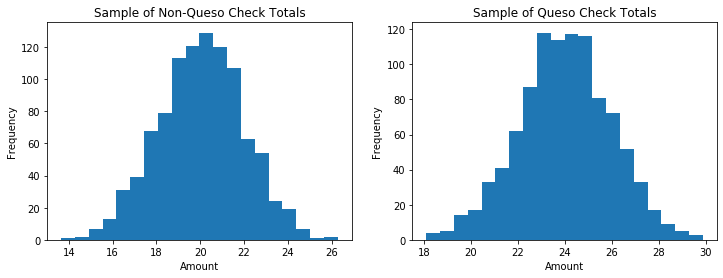

In [15]:
# Load the sample data 
no_queso = pickle.load(open("data/no_queso.pkl", "rb"))
queso = pickle.load(open("data/queso.pkl", "rb"))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### a. Hypotheses and Errors

The restaurant owners want to know if customers who order Queso spend **more or less** than customers who do not order Queso.

3.a.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

Your written answer here
* $H_{0}$: mean of Queso = mean of Non-Queso
* $H_{a}$: mean of Queso is not equal to mean of Non-Queso 

3.a.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

your answer here
* Type I error: if truely the mean of Queso is the same as the mean of Non-Queso but we reject it
* Type II error: if truely the mean of Queso is not equal to the mean of Non-Queso but we accepted it

### b. Sample Testing

3.b.1) Run a statistical test on the two samples. Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance. Can you reject the null hypothesis? 

_Hint: Use `scipy.stats`._

In [23]:
# your code here 
s1_squared = queso.var(ddof = 1)
s2_squared = no_queso.var(ddof = 1)
n1 = len(queso)
n2 = len(no_queso)
sn1 = s1_squared/n1

sn2 = s1_squared/n2

df_num = (sn1 + sn2)**2

df_denom = (sn1)**2 / (n1-1) + (sn2)**2 / (n2-1)

df = df_num/df_denom

print('approximate degrees of freedom is {}'.format(df))

approximate degrees of freedom is 1998.0000000000002


In [24]:
# your answer here
t = (queso.mean() - no_queso.mean())/ np.sqrt(sn1 + sn2)

print('t-statistics is found as {}'.format(t))

p_value = stats.t.sf(t, df = df)*2

print('p_value from cdf {}'.format(p_value))

t-statistics is found as 44.621508384464256
p_value from cdf 2.663085611584821e-302


In [25]:
# Since the p-value is less than 0.05, we can reject the null hypothesis

## Part 4: Bayesian Statistics [Suggested time: 15 minutes]
### a. Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a big, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

4.a.1) What is the probability of Thomas getting a small puppy?
4.a.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
4.a.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
4.a.4) For Part 2, what is the prior, posterior and likelihood?

In [29]:
P_small_puppy = (0.2*0.6 + 0.8*0.1)
p_petstore_given_largepuppy = (0.1*0.2) / (0.1*0.2 + 0.8*0.55)
p_petstore_given_smallpuppy = (0.6 * 0.2) / (0.6 * 0.2 + 0.1 * 0.8)
p_pound_given_smallpuppy = 1 - p_petstore_given_smallpuppy

In [35]:
print(P_small_puppy)
print(p_petstore_given_largepuppy)
print(p_petstore_given_smallpuppy)
print(p_pound_given_smallpuppy)

0.2
0.043478260869565216
0.6
0.4


In [33]:
ans1 = 0.2 
ans2 = 0.043478260869565216
ans3 = "it is more likely he went to the pet store because p_petstore_given_smallpuppy is greater than  p_pound_given_smallpuppy"
ans4_prior = "p_large"
ans4_posterior = "p_petstore_given_largepuppy"
ans4_likelihood = "p_large_given_petstore"

0.2
0.043478260869565216
